# Лабораторная работа #3 часть 2 (+ лаб 3.3)

## **Применение логистической регрессии для решения задачи бинарной классификации**


### Задание 1. Выполнить предобработку данных с помощью Pandas


In [20]:
import pandas as pd
from copy import deepcopy
titanic = pd.read_csv('titanic.csv')
titanic_original = deepcopy(titanic)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


1.1 Удалить все строки данных содержащие пропуски.


In [21]:
titanic.dropna(inplace=True)
titanic.shape

(183, 12)

1.2 Удалить столбцы содержащие не числовые значения, за исключением столбцов Sex и Embarked


In [22]:
titanic.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
# save frame to variable for future use (calculation percentage of lost data)
titanic_dropped = deepcopy(titanic)
titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,2,1,1,female,38.0,1,0,71.2833,C
3,4,1,1,female,35.0,1,0,53.1000,S
6,7,0,1,male,54.0,0,0,51.8625,S
10,11,1,3,female,4.0,1,1,16.7000,S
11,12,1,1,female,58.0,0,0,26.5500,S
...,...,...,...,...,...,...,...,...,...
871,872,1,1,female,47.0,1,1,52.5542,S
872,873,0,1,male,33.0,0,0,5.0000,S
879,880,1,1,female,56.0,0,1,83.1583,C
887,888,1,1,female,19.0,0,0,30.0000,S


1.3 Перекодировать данные в числовой вид в столбцах Sex и Embarked. Sex – 0 и 1, Embarked – 1,2,3


In [23]:
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})
titanic['Embarked'] = titanic['Embarked'].map({'S': 1, 'C': 2, 'Q': 3})

titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,2,1,1,1,38.0,1,0,71.2833,2
3,4,1,1,1,35.0,1,0,53.1000,1
6,7,0,1,0,54.0,0,0,51.8625,1
10,11,1,3,1,4.0,1,1,16.7000,1
11,12,1,1,1,58.0,0,0,26.5500,1
...,...,...,...,...,...,...,...,...,...
871,872,1,1,1,47.0,1,1,52.5542,1
872,873,0,1,0,33.0,0,0,5.0000,1
879,880,1,1,1,56.0,0,1,83.1583,2
887,888,1,1,1,19.0,0,0,30.0000,1


1.4 Удалить столбец PassengerId как не несущий полезной информации.


In [24]:
titanic.drop(['PassengerId'], axis=1, inplace=True)
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,1,38.0,1,0,71.2833,2
3,1,1,1,35.0,1,0,53.1000,1
6,0,1,0,54.0,0,0,51.8625,1
10,1,3,1,4.0,1,1,16.7000,1
11,1,1,1,58.0,0,0,26.5500,1
...,...,...,...,...,...,...,...,...
871,1,1,1,47.0,1,1,52.5542,1
872,0,1,0,33.0,0,0,5.0000,1
879,1,1,1,56.0,0,1,83.1583,2
887,1,1,1,19.0,0,0,30.0000,1


Вычислить процент потерянных данных после выполнения пп 1.1 – 1.2


In [25]:
dropped_percent = (
    titanic_original.shape[0] - titanic_dropped.shape[0]) / titanic_original.shape[0] * 100
print(f'Percentage of dropped data: {dropped_percent:.3f}%')

Percentage of dropped data: 79.461%


### Задание 2. Машинное обучение


2.1 Разбить полученные данные на обучающую и тестовые выборки


In [26]:
from sklearn.model_selection import train_test_split

X = titanic.drop(['Survived'], axis=1)
y = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=17)
X, y

(     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
 1         1    1  38.0      1      0  71.2833         2
 3         1    1  35.0      1      0  53.1000         1
 6         1    0  54.0      0      0  51.8625         1
 10        3    1   4.0      1      1  16.7000         1
 11        1    1  58.0      0      0  26.5500         1
 ..      ...  ...   ...    ...    ...      ...       ...
 871       1    1  47.0      1      1  52.5542         1
 872       1    0  33.0      0      0   5.0000         1
 879       1    1  56.0      0      1  83.1583         2
 887       1    1  19.0      0      0  30.0000         1
 889       1    0  26.0      0      0  30.0000         2
 
 [183 rows x 7 columns],
 1      1
 3      1
 6      0
 10     1
 11     1
       ..
 871    1
 872    0
 879    1
 887    1
 889    1
 Name: Survived, Length: 183, dtype: int64)

2.2 Решить задачу классификации методом логистической регрессии


In [27]:
# 2.2 Решить задачу классификации методом логистической регрессии
from sklearn.linear_model import LogisticRegression
# STOP: TOTAL NO. of ITERATIONS REACHED LIMIT. FIX: increase the number of iterations
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

2.3 Вывести точность полученной модели


In [28]:
from sklearn.metrics import accuracy_score

print(f'Accuracy score with Embarked: {accuracy_score(y_test, y_pred):.3f}')

Accuracy score with Embarked: 0.727


2.4 Оценить влияние признака Embarked на точность модели


In [29]:
# 2.4 Оценить влияние признака Embarked на точность модели

X = titanic.drop(['Survived', 'Embarked'], axis=1)
y = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=17)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

accuracy_score(y_test, y_pred)
print(f'Accuracy score without Embarked: {accuracy_score(y_test, y_pred):.3f}')

Accuracy score without Embarked: 0.709


# Лабораторная работа #3 часть 3

**Изучение метрик классификации при решении задач бинарной классификации**

**Часть 1.**

Основываясь на модели полученной в первой части работы 3.2. (классификация  датасета пассажиров Титаника) дополнить блокнот следующими метриками:

- Precision
- Recall
- F1

In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score

print(f'Precision score: {precision_score(y_test, y_pred):.3f}')
print(f'Recall score: {recall_score(y_test, y_pred):.3f}')
print(f'F1 score: {f1_score(y_test, y_pred):.3f}')

Precision score: 0.900
Recall score: 0.675
F1 score: 0.771


- Отрисовать тепловую карту матрицы ошибок

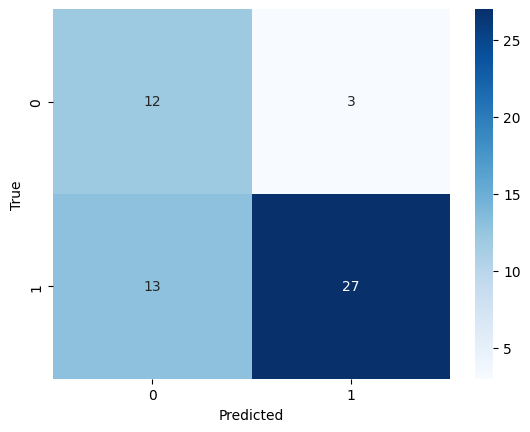

In [31]:
# - Отрисовать тепловую карту матрицы ошибок

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


- Отрисовать кривую РR
- Отрисовать кривую ROC

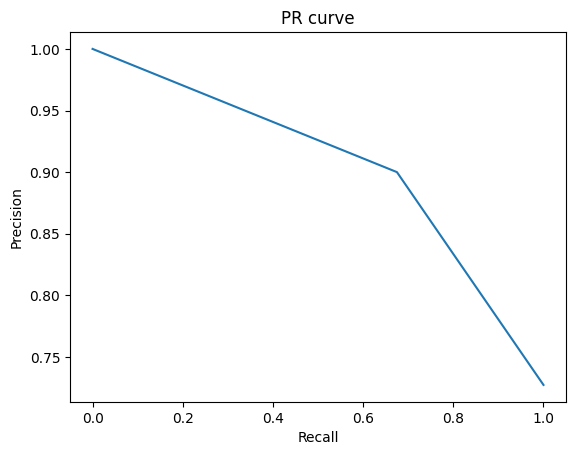

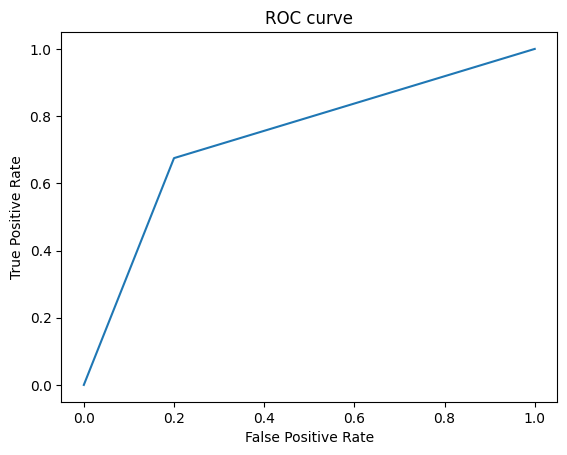

In [32]:
from sklearn.metrics import precision_recall_curve, roc_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

**Часть 2.**

Решить задачу классификации того же датасета, используя модели опорных векторов и ближайших соседей.  Для каждой модели вывести метрики аналогично части 1.

**Загрузка необходимых модулей метрики (пример):**

**from** sklearn.metrics **import** confusion\_matrix, precision\_recall\_curve 

**from** sklearn.metrics **import** recall\_score, precision\_score, f1\_score

Подробнее о поддерживаемых метриках смотите тут – 

<https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics>

In [33]:
# Решить задачу классификации того же датасета (titanic.csv), используя модели опорных векторов
# и ближайших соседей.
# Для каждой модели вывести метрики аналогично части 1 и сделать вывод о наилучшей
# из 3 рассмотренных моделей.

from sklearn.svm import SVC
import tabulate

X = titanic.drop(['Survived'], axis=1)
y = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=17)

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

accuracy_with_embarked = f'{accuracy_score(y_test, y_pred):.3f}'

X = titanic.drop(['Survived', 'Embarked'], axis=1)
y = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=17)

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print(tabulate.tabulate([['Accuracy score without Embarked', accuracy_score(y_test, y_pred)],
                        ['Accuracy score with Embarked', accuracy_with_embarked],
                         ['Precision score', precision_score(y_test, y_pred)],
                         ['Recall score', recall_score(y_test, y_pred)],
                         ['F1 score', f1_score(y_test, y_pred)]],
                        headers=['Metric', 'Value']))

Metric                              Value
-------------------------------  --------
Accuracy score without Embarked  0.727273
Accuracy score with Embarked     0.727
Precision score                  0.727273
Recall score                     1
F1 score                         0.842105
